In [204]:
import torch
from torch.autograd import Variable as V
import torchvision.transforms as T

import cv2
import skimage.io as io
# import skimage.filter
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mimg

from configs import generator_cfg, trainer_cfg
from helpers import Converter
from models import crnn

# uncomment after run generate.py
# datafile = pd.read_csv('./data/data.csv', sep=';', header=None)

%matplotlib inline

from generator import generate
from configs import generator_cfg
import random
cfg = generator_cfg()

In [147]:
t_cfg = trainer_cfg()
d_cfg = generator_cfg()
cvrt = Converter(d_cfg.alph, ignore_case=False)

In [156]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('./model.pt').to(device)

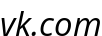

In [252]:
vk = generate(text='vk.com', font=random.choice(d_cfg.fonts), text_color='black', font_size=33, space_width=2)
vk

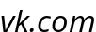

In [253]:
vk.resize((96, 32))

In [254]:
_predict(model, vk, 'vk.com')

(True, 'vk.com', 'vk.com')

In [216]:
def _predict(model, text, gt):
    if isinstance(text, str):
        img = io.imread(fname)
    else:
        img = np.asarray(text)
    # img -= mean
    # img /= std
    img = cv2.resize(img, (96, 32))
    img = np.moveaxis(img, -1, 0)
    img = np.expand_dims(img, 0)
    Y = model(V(torch.from_numpy(img).float().to(device)))
    ret = cvrt.decode_probs(Y)
    if ret.lower() == gt.lower():
        return True, ret, gt
    else:
        return False, ret, gt

(False, 'abdicant', 'felt-shod')


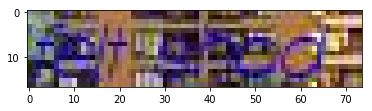

In [205]:
idx=23
print(_predict(model, fnames[fp[idx]], gt[fp[idx]]))
plt.imshow(io.imread(fnames[fp[idx]]))

In [207]:
io.imsave('./misc/false.jpeg', io.imread(fnames[fp[idx]]))

In [258]:
100-len(fp)/933

81.35584137191854